In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### I sped the car up to ~50mph, released throttle and brake, and started collecting velocity (mps) and change in time data to calculate deceleration.

In [2]:
df = pd.read_csv('data/velocity_dt_deceleration_add_on.csv')
df.head()

,v,dt
0,22.920845,0.019699
1,22.827615,0.019972
2,22.736548,0.020192
3,22.736548,0.020073
4,22.736548,0.020253


### Calculate acceleration and add it to the dataframe.

In [3]:
a = []
a.append(0.)

for i in range(1, len(df)):
    temp_a = (df.v[i] - df.v[i-1]) / df.dt[i]
    a.append(temp_a)

df['a'] = a
df = df[1:]
df.head()

,v,dt,a
1,22.827615,0.019972,-4.668025
2,22.736548,0.020192,-4.510050
3,22.736548,0.020073,0.000000
4,22.736548,0.020253,0.000000
5,22.648236,0.022964,-3.845704


### Split acceleration values into buckets so you can average acceleration for every meter-per-second bucket

In [4]:
dfsplit = []
dfsplit.append(df[df.v >= 22])
for i in range(21):
    temp_df = df[df.v >= (21-i)]
    temp_df = temp_df[temp_df.v < (22-i)]
    dfsplit.append(temp_df)

In [5]:
x,y = [], []
for i in range(len(dfsplit)):
    x.append(22-i)
    y.append(np.mean(dfsplit[i].a))

### Plot average acceleration values so if there is any obvious pattern

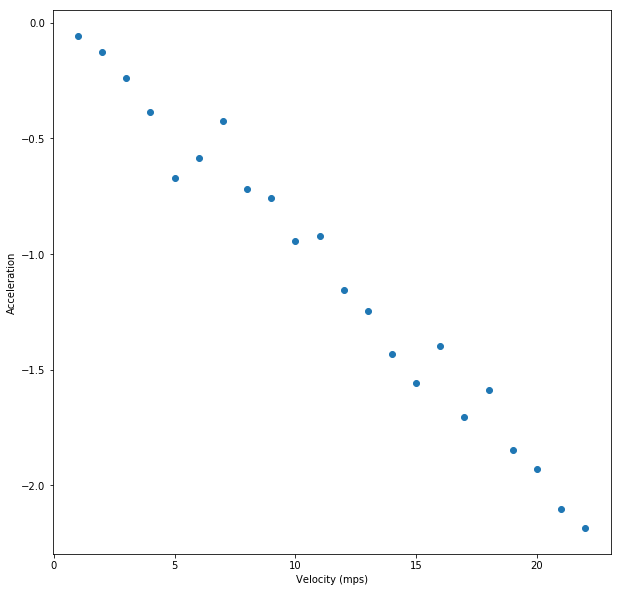

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Velocity (mps)')
plt.ylabel('Acceleration')

### Looks linear to me! I wonder if this will work in real life as it does in the simulator...

In [7]:
coeffs = np.polyfit(x,y,1)
coeffs

array([-0.09949492,  0.05454824])

In [8]:
M = 0.09949492
B = -0.05454824

def accel_add_on(current_linear_v):
    return M*current_linear_v + B

### Change sign of line y-values because I switched the signs of the coefficients so it calculates deceleration as a positive not negative value

In [9]:
line_y = []
_ = [line_y.append(-1*accel_add_on(x[i])) for i in range(len(x))]

### Now plot with line overlay

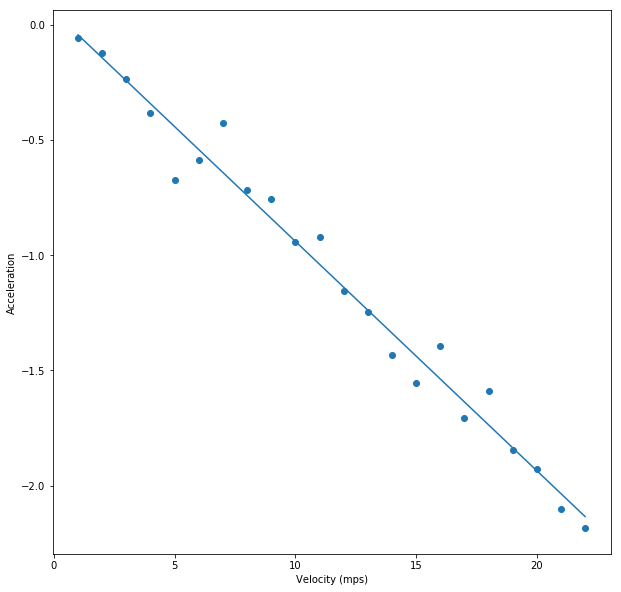

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Velocity (mps)')
plt.ylabel('Acceleration')
plt.plot(x,line_y)

### I think it looks good :)